# Assigment 2: Deep Learning

## Generate Dataset

This is the same code from Assignment 1

In [23]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Generate the data
X, y = datasets.make_regression(n_samples=100, n_features=5, noise=5, random_state=4)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)


## Visualize Dataset
This is the same code from Assignment 1

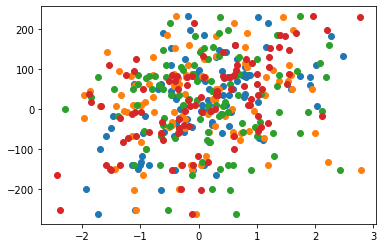

In [19]:
import matplotlib.pyplot as plt
import numpy as np
# Your code here

for i in range(1,5):
   plt.scatter(X[:,1-i],y)


## Model Definition

Using TensorFlow, build a model with the following definition:
> Input of shape 5 \\
> Dense of shape 5 \\
> Dense of shape 5 \\
> Dense of shape 1 \\

Use Mean Square Error Loss and Stochaistic Gradient Descent (SGD) Optimizer

Use Gradient Decay with appropriate parameters

In [20]:
import tensorflow as tf

# Your code here
from tensorflow.keras.layers import Input
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation

model = Sequential()
model.add(Dense(5, activation='relu', input_shape=(5,),  kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.1, l2=0.01)))
model.add(Dense(5, activation='relu',  kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.1, l2=0.01)))
model.add(Dense(1,  kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.1, l2=0.01)))

model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 5)                 30        
                                                                 
 dense_13 (Dense)            (None, 5)                 30        
                                                                 
 dense_14 (Dense)            (None, 1)                 6         
                                                                 
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


In [24]:
opt = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=opt,loss='mse',metrics=['mse'])

history = model.fit(X_train, y_train,epochs=95,validation_data = (X_val, y_val))


Epoch 1/95
2/2 [==============================] - 1s 224ms/step - loss: 11445.3506 - mse: 11443.0117 - val_loss: 11751.5928 - val_mse: 11749.2617
Epoch 2/95
2/2 [==============================] - 0s 25ms/step - loss: 11388.5547 - mse: 11386.2109 - val_loss: 11676.2852 - val_mse: 11673.9004
Epoch 3/95
2/2 [==============================] - 0s 31ms/step - loss: 11312.9395 - mse: 11310.5254 - val_loss: 11543.0605 - val_mse: 11540.5566
Epoch 4/95
2/2 [==============================] - 0s 28ms/step - loss: 11171.5371 - mse: 11168.9863 - val_loss: 11249.1045 - val_mse: 11246.3613
Epoch 5/95
2/2 [==============================] - 0s 37ms/step - loss: 10828.3564 - mse: 10825.5156 - val_loss: 10504.0205 - val_mse: 10500.8379
Epoch 6/95
2/2 [==============================] - 0s 27ms/step - loss: 9788.3818 - mse: 9785.0439 - val_loss: 8203.6611 - val_mse: 8199.5762
Epoch 7/95
2/2 [==============================] - 0s 29ms/step - loss: 6859.7881 - mse: 6855.3271 - val_loss: 3277.5273 - val_mse: 32

## Plot Loss

Using matplotlib visualise how the loss (both validation and training) is changing, use this information to retrain the model with appropriate parameters.<br>We ideally want the loss to be constant over the last few iterations.

1/1 [==============================] - 0s 20ms/step - loss: 65.9450 - mse: 57.9884
dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


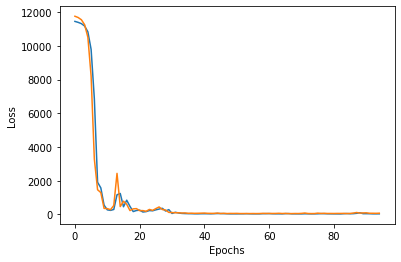

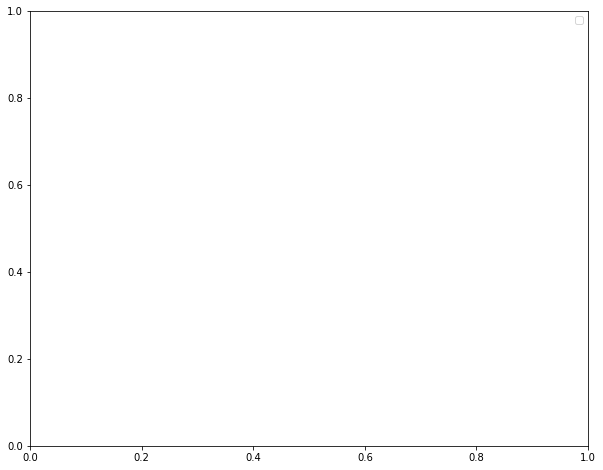

In [27]:
# Your code here
loss , mse = model. evaluate(X_test , y_test, verbose = 1)
y_pred = model.predict(X_test)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history.history['loss'])             
plt.plot(history.history['val_loss'])
plt.figure(figsize=(10, 8)) 
plt.legend(['train_loss', 'validation_loss'], loc='upper right')
print(history.history.keys())
plt.show()

## Evaluation Metrics
Use the R2 Score function implemented in the first assignment to evaluate the performance of the model.

In [28]:
# Insert the function for R2 Score
from sklearn.metrics import r2_score
accu = r2_score(y_test, y_pred) # Pass appropriate parts of dataset
print("Accuracy:", accu)

Accuracy: 0.9942988171707029


## Your own custom model
Build a custom model of your own choice.<br>
Describe it in detail in Markdown/Latex in the cell below.<br>
Visualise the loss, as before.

Your text here

In [33]:
# Your code here
from tensorflow.keras import layers
Model = Sequential(
[
  layers.Dense(5, activation='relu', input_shape=(5,),  kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.1, l2=0.01)),  
  layers.Dense(4, activation='relu',  kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.1, l2=0.01)),
  layers.Dense(4, activation='relu',  kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.1, l2=0.01)),
  layers.Dense(4, activation='relu',  kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.1, l2=0.01)),
  layers.Dense(4, activation='relu',  kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.1, l2=0.01)),
  layers.Dense(4, activation='relu',  kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.1, l2=0.01)),
  layers.Dense(4, activation='relu',  kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.1, l2=0.01)),
  layers.Dense(8, activation='relu',  kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.1, l2=0.01)),
 
  layers.Dense(1,  kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.1, l2=0.01))
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 5)                 30        
                                                                 
 dense_13 (Dense)            (None, 5)                 30        
                                                                 
 dense_14 (Dense)            (None, 1)                 6         
                                                                 
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


**Fitting the model with learning rate**



 




learning rate = 0.1

Total_number_of_iterations = 128

In [34]:
opt = tf.keras.optimizers.Adam(learning_rate=0.1) 
Model.compile(optimizer=opt,loss='mse',metrics=['mse'])
history = Model.fit(X_train, y_train,epochs=128,validation_data = (X_val, y_val))

Epoch 1/128
2/2 [==============================] - 1s 300ms/step - loss: 11436.9512 - mse: 11430.6016 - val_loss: 11803.1855 - val_mse: 11798.6035
Epoch 2/128
2/2 [==============================] - 0s 29ms/step - loss: 11428.8115 - mse: 11424.6836 - val_loss: 11761.7373 - val_mse: 11758.6123
Epoch 3/128
2/2 [==============================] - 0s 27ms/step - loss: 11403.5254 - mse: 11400.5156 - val_loss: 11713.0098 - val_mse: 11710.1172
Epoch 4/128
2/2 [==============================] - 0s 31ms/step - loss: 11375.1133 - mse: 11372.1641 - val_loss: 11547.2207 - val_mse: 11543.9336
Epoch 5/128
2/2 [==============================] - 0s 29ms/step - loss: 11219.4688 - mse: 11216.0098 - val_loss: 11034.4443 - val_mse: 11030.5508
Epoch 6/128
2/2 [==============================] - 0s 33ms/step - loss: 10622.3730 - mse: 10618.3438 - val_loss: 9435.9277 - val_mse: 9431.4277
Epoch 7/128
2/2 [==============================] - 0s 28ms/step - loss: 8676.5771 - mse: 8671.8604 - val_loss: 5997.8911 - va

**LOSSE's**

1/1 [==============================] - 0s 120ms/step - loss: 65.9450 - mse: 57.9884
MSE : 57.988
dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


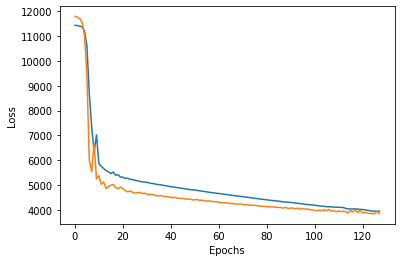

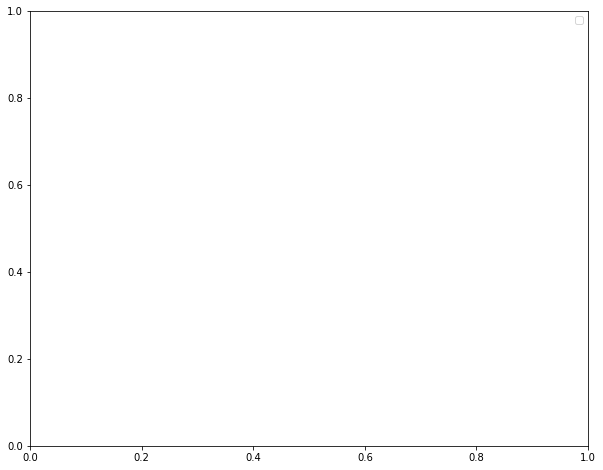

In [36]:
loss , mse = model. evaluate(X_test , y_test, verbose = 1)
print('MSE : %.3f' % mse)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history.history['loss'])             
plt.plot(history.history['val_loss'])
plt.figure(figsize=(10, 8)) 
plt.legend(['train_loss', 'validation_loss'], loc='upper right')
print(history.history.keys())
plt.show()

**Accuracy and r2 score**

In [37]:
accu = r2_score(y_test, y_pred) 
print("Accuracy:", accu)

Accuracy: 0.9942988171707029
